
<div>
<img src="https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/images/mioti.png" width=600 />
</ivdi>
<div class="alert alert-block alert-info">
<h1> 5 Test estadísticos </h1>
</div>

# Tabla de Contenidos
1. [Test estadísticos](#1.-Test_estadísticos)<br>

2. [Test t de Student](#2.-Test_t_de_Student)<br>
   2.1 [Características](#2.1-Características)<br>
   2.2 [Normalidad: Shapiro-Wilk](2.2-Normalidad:-Shapiro-Wilk)<br>
   2.3 [Igualdad de varianzas: Levene y Bartlett](2.3.-Igualdad-de-varianzas:-Levene-y-Bartlett)<br>
   2.4 [Mann–Whitney U](2.4-Mann–Whitney-U)<br>
   

3. [ANOVA](#1.-ANOVA)<br>
   3.1 [Objetivo e hipótesis nula](#3.1-Objetivo-e-hipótesis-nula)<br>
   3.2 [ANOVA con librerías](#3.2-ANOVA-con-librerías)<br>
   3.3 [Test de Friedman](#3.2-Test_de_Friedman)<br>
   <br>
4. [Test de la $\chi^2$](#2.-Test-de-la-$\chi^2$)<br>
   4.1 [Objetivo e hipótesis nula](#4.1-Objetivo-e-hipótesis-nula)<br>
   4.2 [Ejemplo paso a paso](#4.2-Ejemplo-paso-a-paso)<br>
   4.3 [$\chi^2$ con librerías](#4.3-$\chi^2$-con-librerías)<br>
   <br>
5. [Estacionariedad](#3.-Estacionariedad)<br>
   5.1 [Objetivo e hipótesis nula](#3.1-Objetivo-e-hipótesis-nula)<br>
   5.2 [Ejemplo](#3.2-Ejemplo)<br>
   <br>
6. [Referencias](#4.-Referencias)<br>


## 1.- Test estadísticos
---

Un test estadístico es un procedimiento matemático para decidir si una o más  muestras de datos son compatiblee con una hipótesis concreta.

Ejemplo: ¿Tiene estas dos variables la misma media?

Al trabajar con muestras los tests no nos dan certeza, solo nos indican lo probable o improbable que es que se dé la hipótesis

<div class="alert alert-success">
    Cada test tiene su hipótesis asoaciada, la llamada hipótesis nula, representada por $H_0$
</div>

El test suele darnos dos valores:

* p-value: La probabilidad de que se cumpla la hipótesis nula. Es decir, al tomar muestras de características similares a la muestra en qué proporción se verificará $H_0$.

* Estadístico: un valor numérico asociado a la fórmula del test. Cuanto mayor es menor suele ser el p-value. Es útil para comparar el resultado dle mismo test sobre dos conjuntos de datos

Cuando el test devuelve un p-value muy pequeños (<0.01, o <0.05) podemos decir que la hipótesis nula es muy improbable y que podemos rechazarla. 

Por ejemplo si la hipótesis nula es que ambas tienen la misma media, y obtenemos $p = 0.0001$ podremos decir que es muy improbable que ambas muestras tengan la misma media, es decir, podemos asegurar que tienen media distinta (con validez estadística)

Sin embargo, si $p>0.05$ NO PODREMOS DECIR NADA. Puede que el test no pueda establecer la diferencia por carecer de datos suficientes en nuestras muestras 

<div class="alert alert-danger">
        El resultado de un test puede ser que se rechaza la hipotesis nula, o bien que no se puede asegurar nada
</div>

Los tests suelen dividirse en dos tipos:

- Paramétricos: tienen requerisitos que las muestras deben cumplir, como por ejemplo pertenecer a una normal
- No paramétricos: no tienen requisitos iniciales. A cambio es más difícil que rechacen la hipótesis nula.


## 2. t de Student


### 2.1 Características
Se utiliza para ver si las medias de dos muestras son iguales

$H_0$: las medias son iguales

Asume :

1) Normalidad, o bien que hay un número considerable de valores en cada muestra (n>30)

2) Varianzas aproximadamente iguales

In [9]:
import numpy as np
from scipy import stats

def t_student(grupo1, grupo2):
    # Aplicamos el test t de Student para muestras independientes
    t_stat, p_value = stats.ttest_ind(grupo1, grupo2)

    # Mostramos los resultados
    print(f"Estadístico t: {t_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")

    # Interpretación del resultado
    alpha = 0.05
    if p_value < alpha:
        print("Hay evidencia suficiente para rechazar la hipótesis nula: las medias son diferentes.")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula: las medias pueden ser iguales.")


cara, cruz = 0,1
grupo1 = [cara,cruz,cara,cara]  # ojo, muestras muy pequeñas
grupo2 = [cruz,cruz,cara,cruz]

t_student(grupo1,grupo2)


Estadístico t: -1.4142
Valor p: 0.2070
No hay evidencia suficiente para rechazar la hipótesis nula: las medias pueden ser iguales.


In [11]:
cara, cruz = 0,1
grupo1 = [cara,cruz,cara,cara]*20
grupo2 = [cruz,cruz,cara,cruz]*20

t_student(grupo1,grupo2)

Estadístico t: -7.2572
Valor p: 0.0000
Hay evidencia suficiente para rechazar la hipótesis nula: las medias son diferentes.


### 2.2 Normalidad: Shapiro-Wilk

¿Cómo sé si los datos siguen una normal? PAra ello se suele utilizar el test de Shapiro-Wilk

$H_0$ (hipótesis nula): Los datos provienen de una distribución normal.


Nota: Realmente el test no es muy útil porque nunca asegura que algo sea una normal, en todo caso puede descartarlo. En realidad se suele asumir si el histograma "parece normal" y el tamaño de las muestras es >30. Otra alternativa son los llamados QQ-plot

In [5]:
from scipy import stats
# Aplicar el test de Shapiro-Wilk

def test_normalidad(test,grupo):
    stat, p = test(grupo)
    
    print("Estadístico:", stat)
    print("p-valor:", p)
    
    if p < 0.05:
        print("Los datos NO siguen una distribución normal.")
    else:
        print("Los datos podrían seguir una distribución normal...o no")

test_normalidad(stats.shapiro,grupo1)

Estadístico: 0.5435627937132307
p-valor: 8.080369646994802e-07
Los datos NO siguen una distribución normal.


Este test es adecuado para pocos valores (menos de 5000); en otro caso conviene complementar con otros valores

In [2]:
url = "https://ucmdrive.ucm.es/s/kaERdRZYEGjSbRd/download/hotel_booking.csv.zip"

import pandas as pd
df = pd.read_csv(url)
from tqdm import tqdm
veces = 10000
muestra = 250
filtroB = df.hotel=="City Hotel"
df_hotel = df[filtroB]

# solución
mediaH = []
for i in tqdm(range(veces)):
    mH = df_hotel.sample(muestra)
    mediaH.append(mH.is_canceled.mean())

df_medias = pd.DataFrame({"H":mediaH})
df_medias

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 496.21it/s]


,H
0,0.448
1,0.408
2,0.428
3,0.364
4,0.388
...,...
9995,0.448
9996,0.348
9997,0.448
9998,0.408


In [6]:
test_normalidad(stats.shapiro,df_medias.H)

Estadístico: 0.9984959144755756
p-valor: 3.521636968210825e-08
Los datos NO siguen una distribución normal.


C:\Users\sames\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
test_normalidad(stats.normaltest,df_medias.H) # D’Agostino-Pearson

Estadístico: 0.04859342437074347
p-valor: 0.9759960768623495
Los datos podrían seguir una distribución normal...o no


El QQ-plot prueba que es una normalidad si los datos siguen una recta

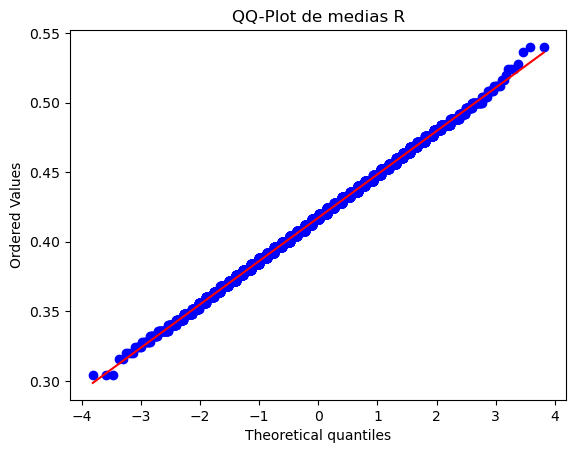

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df_medias["H"], dist="norm", plot=plt)
plt.title("QQ-Plot de medias R")
plt.show()

### 2.3 Igualdad de varianzas: Levene y Bartlett

¿Cómo sé si las varianzas son o no iguales?

Pruebas de Levene (no asumen normalidad) o Bartlett (sí asume normalidad, admite más de dos grupos como entrada y se utiliza mucho antes de aplicar ANOVA); 

En ambos casos 

$H_0$: igualdad de varianzas

In [22]:
import numpy as np
from scipy import stats

# Creamos dos grupos con varianzas distintas
grupo1 = np.random.normal(loc=50, scale=5, size=50)  # Media 50, Desviación 5
grupo2 = np.random.normal(loc=55, scale=6, size=50)  # Media 55, Desviación 15

# Verificamos si las varianzas son realmente diferentes con la prueba de Levene
stat, p_var = stats.levene(grupo1, grupo2)
print(f"Prueba de Levene (varianza): p-value = {p_var:.4f}. Estadístico: {stat:.4f}")


Prueba de Levene (varianza): p-value = 0.6517. Estadístico: 0.2050


In [23]:
stat, p_var = stats.bartlett(grupo1,grupo2)
print(f"Prueba de bartlett (varianza): p-value = {p_var:.4f}. Estadístico: {stat:.4f}")


Prueba de bartlett (varianza): p-value = 0.9445. Estadístico: 0.0048


Si las varianzas no son iguales aplicaremos el test de Welch, también conocido como la prueba t de Student para variables de varianza desigual

In [6]:
import numpy as np
from scipy import stats

# Creamos dos grupos con varianzas distintas
grupo1 = np.random.normal(loc=50, scale=5, size=30)  # Media 50, Desviación 5
grupo2 = np.random.normal(loc=55, scale=15, size=30)  # Media 55, Desviación 15

# Aplicamos la prueba de Welch (t-test con varianzas desiguales)
t_stat, p_value = stats.ttest_ind(grupo1, grupo2, equal_var=False)

print(f"\nPrueba de Welch:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Las medias son significativamente diferentes.")
else:
    print("No hay evidencia suficiente para afirmar que las medias son diferentes.")


Prueba de Welch:
Estadístico t: -0.9418
Valor p: 0.3529
No hay evidencia suficiente para afirmar que las medias son diferentes.


### 2.4 Mann–Whitney U 

Si ni siquiera podemos asumir normalidad de los datos, entonces podemos utilizar la prueba Mann–Whitney U (también conocida como Wilcoxon rank-sum test) es una alternativa no paramétrica al test t de Student 

$H_0$: la mediana de ambas distribuciones es la misma

In [25]:
import numpy as np
from scipy.stats import mannwhitneyu

# Datos de ejemplo
grupo1 = [6, 7, 8, 9, 7, 8, 6, 6, 7, 8]
grupo2 = [3, 4, 5, 4, 3, 5, 4, 3, 5, 4]

# Aplicamos la prueba de Mann-Whitney U
stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided') # greater si se quiere comprobar med(grupo1)>med(grupo2)

print(f"Estadístico U: {stat}")
print(f"Valor p: {p:.4f}")


Estadístico U: 100.0
Valor p: 0.0002


Otro ejemplo. Tenemos 2 productos y los usuarios han puntuado acerca de su satisfacción con valores entre 0 y 10

C:\Users\sames\AppData\Local\Temp\ipykernel_10940\1961040393.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo1, grupo2], labels=["Producto A", "Producto B"])


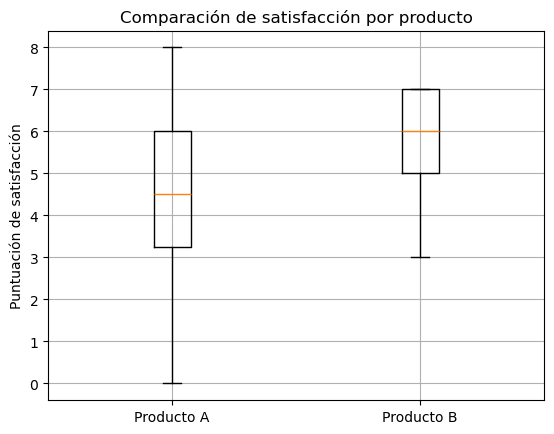

Estadístico U: 97.00
Valor p: 0.0620
No se detecta una diferencia significativa.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Simulamos dos grupos con distribuciones diferentes
grupo1 = [0,4,6,7,3,5,7,8,2,4,5,8,4,3,4,2,5,6] # Producto A
grupo2 = [6,5,5,3,6,7,7,7,5,3,6,7,7,7,5,7,7]  # Producto B

# Gráfico de cajas
plt.boxplot([grupo1, grupo2], labels=["Producto A", "Producto B"])
plt.title("Comparación de satisfacción por producto")
plt.ylabel("Puntuación de satisfacción")
plt.grid(True)
plt.show()

# Prueba de Mann-Whitney U
stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')

print(f"Estadístico U: {stat:.2f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("Hay una diferencia significativa en la satisfacción de los clientes.")
else:
    print("No se detecta una diferencia significativa.")


## 3. ANOVA
---

ANOVA (de _Analysis of Variance) es uno de los tests más utilizados por su simplicidad. Creado en el siglo XIX por Ronald Fisher ha evolucionado hasta tener múltiples variantes.


<div class="alert alert-success">
Aqui vamos a ver ANOVA unidireccional, pero hay otras versiones más complejas como ANOVA de dos vías, que sigue las mismas ideas pero permite añadir otras variables 
</div>


### 3.1 Objetivo e hipótesis nula


El objetivo de este test es determinar si varios grupos de datos (por ejemplo varias columnas de un dataframe) tienen la misma media.

La hipótesis nula es:

$H_0$: la media de todos los grupos es la misma, $\mu_1 = \mu_2 = \dots \mu_n$.

Por tanto rechazaremos la hipótesis nula si obtenemos $p < 0.01$ (o $p < 0.05$), afirmando en este caso que las medias no son iguales con alta probabilidad estadística.

Varias cosas que hay que tener en cuenta:


<div class="alert alert-success">
El test ANOVA nos dice que las medias no son todas iguales  pero no cuál del grupo difiere, o si son una o varias.
</div>

<div class="alert alert-success">
ANOVA es un test parmétrico. Asume que se cumple:

1.- Independencia:	Observaciones separadas y no relacionadas. Dependerá del diseño del experimento.
    
2.- Normalidad	Datos (normales en cada grupo). Esto se puede comprabar con los	Q-Q plots, o el test de Shapiro-Wilk

3.- Homocedasticidad (varianzas similares): Tests	Levene, Bartlett
</div>


El test comparará la dispersión de las medias con el respecto a la media total con respecto a la dispersión dentro de cada grupo, que debe ser similar. También tiene en cuenta el número de grupos y de elementos en cada grupo.


### 3.2 ANOVA con librerías

Veamos todo pero utilizando directamente una librería:

Supongamos que tenemos tres grupos de plantas, cada uno con diferentes tratamientos de fertilizante, y hemos medido sus alturas (en cm) tras cierto periodo de tiempo obteniendo:


In [39]:
import numpy as np
A = np.array([20, 22, 21, 23,21]) # plantas con fertilizante A
B = np.array([20, 20, 24, 25,20]) # plantas con fertilizante B
C = np.array([22, 22, 24, 23,30,27,28]) # plantas con fertilizante C

Objetivo: ver si el fertilizante influye.

Podemos calcular las medias de cada grupo

$$ \text{Media A} = \frac{20 + 22 + 21 + 23}{4} = 21.5 $$

$$ \text{Media B} = \frac{30 + 32 + 31 + 29}{4} = 30.5 $$

$$ \text{Media C} = \frac{25 + 24 + 26 + 27}{4} = 25.5 $$

In [40]:
mediaA = A.mean()
mediaB = B.mean()
mediaC = C.mean()
print(f"Media A {mediaA:.1f}, Media B {mediaB:.1f}, Media C {mediaC:.1f}")

Media A 21.4, Media B 21.8, Media C 25.1


Las medias salen diferentes, pero sabemos que eso no significa necesariamente que la diferencia sea estadísticamente significativa. Veámoslo con ANOVA

In [41]:
from scipy.stats import f_oneway

# Realizar el test ANOVA para los tres grupos A, B y C
anova_result = f_oneway(A, B, C)

# Obtener el estadístico F y el p-valor del test ANOVA
anova_result.statistic, anova_result.pvalue


(4.012763596004439, 0.04191911101258861)

### 3.3 Test de Friedman

Tengo 10 personas, y a cada una le hago probar tres métodos diferentes para resolver un problema. Quiero saber si alguno de los métodos funciona mejor que los otros en cuento al tiempo de resolución.

En este caso NO puedo usar ANOVA ¿Por qué? porque no se trata de 30 personas diferentes, cada persona prueba los 3 métodos por lo que no se tiene independencia

   Persona  Método A  Método B  Método C
0        1      7.61     10.07     11.09
1        2      9.10      7.31     10.63
2        3     10.01      6.70      7.63
3        4     10.07     10.92      9.46
4        5      9.32      9.50      8.97
5        6     10.93      7.88     10.05
6        7      8.40     11.33      6.55
7        8      9.79      9.17      9.03
8        9     10.18     10.77      9.59
9       10     10.77      9.10      5.36
    Persona    Método  Tiempo
0         1  Método A    7.61
1         2  Método A    9.10
2         3  Método A   10.01
3         4  Método A   10.07
4         5  Método A    9.32
5         6  Método A   10.93
6         7  Método A    8.40
7         8  Método A    9.79
8         9  Método A   10.18
9        10  Método A   10.77
10        1  Método B   10.07
11        2  Método B    7.31
12        3  Método B    6.70
13        4  Método B   10.92
14        5  Método B    9.50
15        6  Método B    7.88
16        7  Método B   11.33
17       

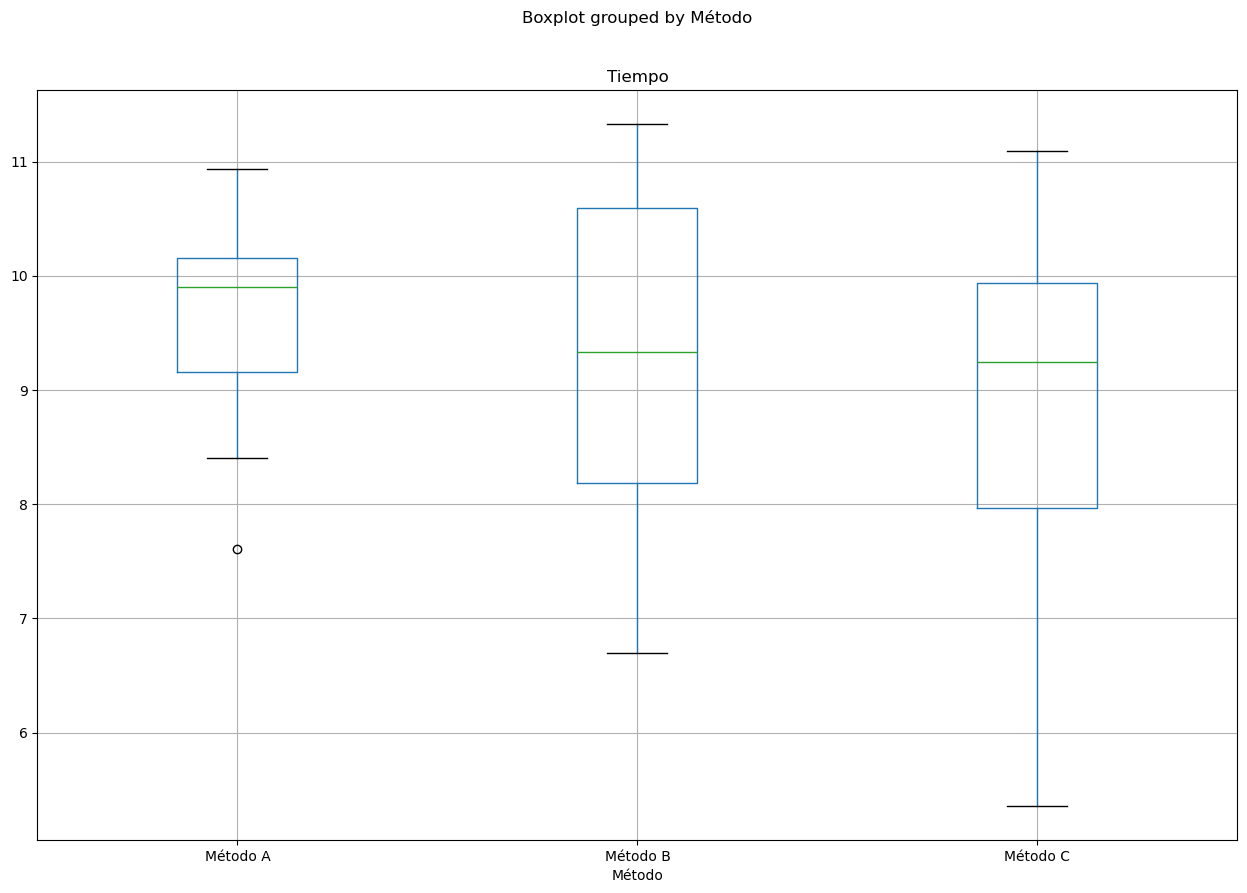

In [42]:
import numpy as np
from scipy.stats import friedmanchisquare
import pandas as pd
import matplotlib.pyplot as plt

# Resultados simulados (filas = personas, columnas = métodos)
personas = 10

# Supongamos que los valores son tiempos para resolver un problema (menos es mejor)
metodo_A = [ 7.61,  9.1,  10.01, 10.07,  9.32, 10.93,  8.40,  9.79, 10.18, 10.77]
metodo_B = [10.07,  7.31,  6.7,  10.92,  9.50,  7.88, 11.33,  9.17, 10.77,  9.1 ]
metodo_C = [11.09, 10.63,  7.63,  9.46,  8.97, 10.05,  6.55,  9.03,  9.59,  5.36]

# convertimos a df
df = pd.DataFrame({
    "Persona": range(1, personas+1),
    "Método A": metodo_A,
    "Método B": metodo_B,
    "Método C": metodo_C
})
print(df.round(2))

# Boxplots
df_largo = df.melt(id_vars="Persona", var_name="Método", value_name="Tiempo") 
print(df_largo.round(2))
df_largo.boxplot(column = "Tiempo", by="Método",  figsize=(15,10))
plt.show()


Queremos ver si esas diferencias son significativas

In [13]:


# Aplicamos el test de Friedman
stat, p = friedmanchisquare(metodo_A, metodo_B, metodo_C)

print(f"Estadístico de Friedman: {stat:.3f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("Hay diferencias significativas entre al menos dos métodos.")
else:
    print("No se detectan diferencias significativas entre los métodos.")


Estadístico de Friedman: 2.600
Valor p: 0.2725
No se detectan diferencias significativas entre los métodos.


## 4. Test de la $\chi^2$
---

La distribución $\chi^2$ tiene múltiples aplicaciones, pero aquí nos centramos en intentar ver si dos variables categóricas están asociadas o no. 


### 4.1 Objetivo e hipótesis nula


​Hipótesis nula

$H_0$: Las dos variables son independientes.

Es decir, la hipótesis nula es que no existe una relación o asociación significativa entre las dos variables categóricas, lo que implica que la distribución conjunta de las frecuencias observadas es consistente con lo que esperaríamos si las variables fueran independientes. 


### 2.2 Ejemplo paso a paso

Empezamos, como siempre, cargando los datos. En este caso comparamos el nivel de educación con el transporte utilizado

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/transporte.csv"
df = pd.read_csv(url)
df

,NivelEducacion,Transporte
0,Universitaria,Coche
1,Secundaria,Bicicleta
2,Secundaria,Coche
3,Primaria,Bicicleta
4,Primaria,Coche
...,...,...
295,Primaria,Coche
296,Primaria,Coche
297,Primaria,Bicicleta
298,Primaria,Bicicleta


**Paso 1**. Frecuencias observadas



In [45]:
# Ver la tabla de frecuencias observada
tabla_observada = pd.crosstab(df["NivelEducacion"], df["Transporte"])
n = tabla_observada.sum().sum()
print("Total Elementos", n)
tabla_observada

Total Elementos 300


Transporte,Bicicleta,Coche,Transporte Público
NivelEducacion,,,
Primaria,34,54,23
Secundaria,31,63,15
Universitaria,17,32,31



**Paso 2** Frecuencias esperadas.

Para razonar sobre las frencuencias esperadas, consideremos:


In [46]:
print(df.NivelEducacion.unique())
df.NivelEducacion.value_counts(normalize=True)

['Universitaria' 'Secundaria' 'Primaria']


NivelEducacion
Primaria         0.370000
Secundaria       0.363333
Universitaria    0.266667
Name: proportion, dtype: float64

In [47]:
print(df.Transporte.unique())
df.Transporte.value_counts()

['Coche' 'Bicicleta' 'Transporte Público']


Transporte
Coche                 149
Bicicleta              82
Transporte Público     69
Name: count, dtype: int64

Así pues, hay 149 pesonas que van en coche. Si la educación no influye entonces esos 149 se repartirán de acuerdo con la proporción de medios de transporte: 

Primaria y coche: $149 \times .37  =55.13$

Secundaria y coche: $149 \times 0.36333 = 54.1317$

Universitaria y coche: $149 \times 0.26667 = 39,7339$

y los 3 valores, suman como era de esperar, 149. 

In [48]:
# Calcular las frecuencias esperadas
esperadas= pd.DataFrame(index=tabla_observada.index, columns=tabla_observada .columns)

for row in tabla_observada.index:
    for col in tabla_observada .columns:
        esperadas.loc[row, col] = (tabla_observada.loc[row].sum() * tabla_observada[col].sum()) /n

esperadas
#expected_frequencies = expected_frequencies.astype(float)
#expected_frequencies

Transporte,Bicicleta,Coche,Transporte Público
NivelEducacion,,,
Primaria,30.34,55.13,25.53
Secundaria,29.793333,54.136667,25.07
Universitaria,21.866667,39.733333,18.4


Lo que hace este test es comparar el valor esperado y el observado y determinar si estadísticamente esa distribución es razonable. 

### 4.3 $\chi^2$ con librerías

Veamos el ejemplo todo junto:   |


In [49]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/transporte.csv"
df = pd.read_csv(url)

# Ver la tabla de frecuencias observada
tabla_observada = pd.crosstab(df["NivelEducacion"], df["Transporte"])
print("Tabla de Frecuencias Observada:\n", tabla_observada)

# Calcular el test de Chi-cuadrado
chi2, p, dof, tabla_esperada = chi2_contingency(tabla_observada)

# Mostrar resultados
print(f"Valor p: {p}")

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("\nRechazamos la hipótesis nula: Existe una asociación significativa entre el nivel de educación y el transporte preferido.")
else:
    print("\nNo se puede rechazar la hipótesis nula: No se encontró asociación significativa entre el nivel de educación y el transporte preferido.")


Tabla de Frecuencias Observada:
 Transporte      Bicicleta  Coche  Transporte Público
NivelEducacion                                      
Primaria               34     54                  23
Secundaria             31     63                  15
Universitaria          17     32                  31
Valor p: 0.0015611685362774046

Rechazamos la hipótesis nula: Existe una asociación significativa entre el nivel de educación y el transporte preferido.


In [20]:
df2 = pd.get_dummies(df)
df2

,NivelEducacion_Primaria,NivelEducacion_Secundaria,NivelEducacion_Universitaria,Transporte_Bicicleta,Transporte_Coche,Transporte_Transporte Público
0,False,False,True,False,True,False
1,False,True,False,True,False,False
2,False,True,False,False,True,False
3,True,False,False,True,False,False
4,True,False,False,False,True,False
...,...,...,...,...,...,...
295,True,False,False,False,True,False
296,True,False,False,False,True,False
297,True,False,False,True,False,False
298,True,False,False,True,False,False


In [21]:
df2.corr()

,NivelEducacion_Primaria,NivelEducacion_Secundaria,NivelEducacion_Universitaria,Transporte_Bicicleta,Transporte_Coche,Transporte_Transporte Público
NivelEducacion_Primaria,1.000000,-0.578931,-0.462130,0.056699,-0.015604,-0.041507
NivelEducacion_Secundaria,-0.578931,1.000000,-0.455544,0.018765,0.122859,-0.165840
NivelEducacion_Universitaria,-0.462130,-0.455544,1.000000,-0.082312,-0.116587,0.225686
Transporte_Bicicleta,0.056699,0.018765,-0.082312,1.000000,-0.609233,-0.335195
Transporte_Coche,-0.015604,0.122859,-0.116587,-0.609233,1.000000,-0.542904
Transporte_Transporte Público,-0.041507,-0.165840,0.225686,-0.335195,-0.542904,1.000000


## 5. Estacionariedad
---

Una serie temporal es estacionaria si sus características estadísticas, como la media, la varianza y la autocorrelación, no cambian con el tiempo. 

<div class="alert alert-success">
Dado que las técnicas de machine learning supervisado buscan patrones que se repitan en el tiempo interesa que la serie sea estacionaria porque así se podrán detectar estos patrones. Si el método encuentra que los datos son siempre "nuevos", distintos a los anteriores, no podrá encontrar una forma eficiente de modelizar ni predecir
</div>

Un caso típico de datos no estacionarios son los datos que dependen del día anterior, por ejemplo valores bursátiles, o valores que nos digan cada día del mes el total mensual vendido hasta el momento.

Una propiedad negativa adicional de los datos no estacionarios es que tiende a exhibir altos pero falsos coeficientes de correlación.

<div class="alert alert-success">
No confundir estacionariedad con estacionalidad, otra propiedad que habla de datos que tienen a ser similares en ciertas épocas.
</div>




### 5.1 Objetivo e hipótesis nula


**Test Dickey-Fuller Aumentado (ADF)**

Hipótesis Nula. $H_0$: la serie temporal no es estacionaria. Asume ciertas propiedades de los errores (media cero)

KPSS test: evalúa la hipótesis opuesta (H₀: la serie es estacionaria) y es no paramétrico

### 5.2 Ejemplo



In [22]:
import yfinance as yf
import pandas as pd

# Definir los símbolos de los 5 primeros valores del IBEX 35
symbols = ['BBVA.MC', 'IBE.MC', 'ITX.MC', 'REP.MC','SAN.MC' ]  # cód. Yahoo
nombre = ['BBVA', 'Iberdrola', 'Inditex', 'Repsol','Santander']  # Nombre

# descargamos y nos quedamos solo con los valores al cierre
df = yf.download(tickers=symbols, period='max').loc[:,["Close","Volume"]].dropna()
df.columns = ['_'.join(col).strip() for col in df.columns]

# Crear un diccionario de mapeo
mapping = dict(zip(symbols, nombre))

# Renombrar las columnas usando el diccionario
df.columns = [col.split('_')[0] + '_' + mapping.get(col.split('_')[1], col.split('_')[1]) for col in df.columns]
df

[*********************100%***********************]  1 of 5 completed

5 Failed downloads:
['IBE.MC', 'ITX.MC', 'BBVA.MC', 'SAN.MC', 'REP.MC']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


,Close_BBVA,Close_Iberdrola,Close_Inditex,Close_Repsol,Close_Santander,Volume_BBVA,Volume_Iberdrola,Volume_Inditex,Volume_Repsol,Volume_Santander
Date,,,,,,,,,,


In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def estacionariedad(df,alpha=0.01):  
    for c in df.columns:
        serie_temporal = df[c]
        pads = adfuller(serie_temporal)[1]
        if pads<=alpha: # descartamos que no es estacionaria
            print(f"La columna {c} es estacionaria según el test ADS; p={pads:.3f}")
        else:
            print(f"No puedo descartar que {c} no sea no estacionaria según el test ADS; p={pads:.3f}")

estacionariedad(df)


[*********************100%***********************]  1 of 5 completed
[*********************100%***********************]  1 of 5 completed
[*********************100%***********************]  1 of 5 completed
[*********************100%***********************]  1 of 5 completed

ValueError: sample size is too short to use selected regression component

Parece que no podemos garantizar que las columnas primeras sean estacionarias ¿qué hacer? 

Hay varios métodos. Quizás el más famoso es el llamado "detrending" que consiste en cambiar los valores por incrementos con respecto al día anterior


In [ ]:
cols_dudosas = [c for c in df.columns if  "Volume_" not in c]
df2 = df[cols_dudosas].diff().dropna()

estacionariedad(df2)

In [ ]:
filtro = df.index >= '2024'

df[filtro].Close_BBVA.plot(kind="line")

In [ ]:
filtro = df2.index >= '2024'

df2[filtro].Close_BBVA.plot(kind="line")

In [ ]:
cols_dudosas = [c for c in df.columns if  "Volume_" not in c]
df3 = df[cols_dudosas].pct_change().dropna()

estacionariedad(df3)

filtro = df3.index >= '2024'

df3[filtro].Close_BBVA.plot(kind="line")

Eso sí, recordar ahora que si se aplican métodos de machine learning estamos prediciendo incrementos


## 6. Referencias
---

[Sobre los efectos no deseados de la no estacionariedad](https://www.quora.com/Why-do-people-convert-time-series-data-to-stationary-form-for-modeling) 

[Estacionariedad y como conseguirla](https://otexts.com/fpp2/stationarity.html). Por desgracia está para R, no para Python, pero en general esta página y las que la contienen explican muy bien los conceptos   

*Python para análisis de datos*. El libro por excelencia para análisis de datos, un repaso muy completo aunque no cubre mucha de la parte de estadística que hemos visto en el curso hay más Python y Pandas. [Aquí](https://www.oreilly.com/library/view/python-for-data/9781491957653/) se puede consultar el índice. 

*Think STATS: Exploratory Data Analysis*. Un buen libro para estadística en general a partir de Python. Ojo porque no pretende enseñar las principales librerías sino los conceptos. El autor presenta su propio código, algo parecido a cuando hemos hecho las pruebas "a mano" antes de pasar a una librería.

*Think Bayes: Bayesian Statistics in Python*. Buen complemento al anterior para entender el concepto de estasdística bayesiana. No es difícil pero hay que dedicarle tiempo. El resultado merece la pena.
